<a href="https://colab.research.google.com/github/Abasfreky1/MLAlgorithms/blob/master/Image_segmentation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


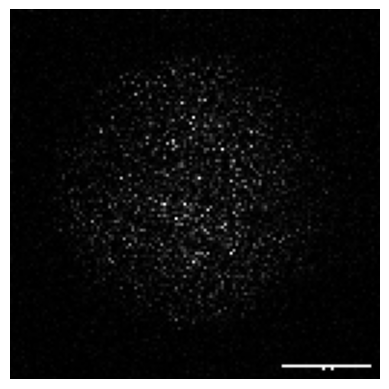

Loaded 8 images with shape: (8, 128, 128, 1)


In [ ]:
from google.colab import drive
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Define the folder path on Google Drive where your images are stored
folder_path = '/content/drive/MyDrive/Bio Imaging Computer Vision - eSRRF images/'

# Initialize lists to store the images and their arrays
image_list = []
image_array_list = []

# Iterate over all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Add other extensions if needed
        img_path = os.path.join(folder_path, filename)

        # Load the image and convert it to a numpy array
        img = load_img(img_path, color_mode='grayscale', target_size=(128, 128))
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]

        # Append the image and its array to the lists
        image_list.append(img)
        image_array_list.append(img_array)

# Convert the list of image arrays to a numpy array
image_array_stack = np.stack(image_array_list)

# Show one of the images (e.g., the first one)
plt.imshow(np.squeeze(image_array_list[0]), cmap='gray')
plt.axis('off')
plt.show()

# Print shape of the array
print(f"Loaded {len(image_list)} images with shape: {image_array_stack.shape}")



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded multiple images in image_array_stack
# Let X be the images, and for now, use the same images as dummy masks for Y

X = image_array_stack  # Loaded images as input
Y = image_array_stack  # Dummy masks, replace with actual mask data if available

# Split the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the split data
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_val shape: {X_val.shape}, Y_val shape: {Y_val.shape}")


X_train shape: (6, 128, 128, 1), Y_train shape: (6, 128, 128, 1)
X_val shape: (2, 128, 128, 1), Y_val shape: (2, 128, 128, 1)


In [ ]:
from tensorflow.keras import layers, models

def unet_model(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(conv4)

    # Bottleneck
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Decoder
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(conv5)
    up6 = layers.concatenate([up6, conv4])
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    up7 = layers.concatenate([up7, conv3])
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    up8 = layers.concatenate([up8, conv2])
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    up9 = layers.concatenate([up9, conv1])
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv9)

    model = models.Model(inputs=[inputs], outputs=[outputs])

    return model


In [ ]:
model = unet_model()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │      2,097,664 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ conv2d_transpose[0][0… │
│                      

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=2,
    validation_data=(X_val, Y_val)
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.1388 - loss: 0.6770 - val_accuracy: 0.0059 - val_loss: 0.5015
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.0858 - loss: 0.5332 - val_accuracy: 0.0059 - val_loss: 0.4786
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.1403 - loss: 0.4188 - val_accuracy: 0.0059 - val_loss: 0.4552
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.1403 - loss: 0.3549 - val_accuracy: 0.0059 - val_loss: 0.5439
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.1512 - loss: 0.2715 - val_accuracy: 0.0059 - val_loss: 0.5124
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.1185 - loss: 0.2853 - val_accuracy: 0.0059 - val_loss: 0.3692
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.1076 - loss: 0.2838 - val_accuracy: 0.0059 - val_loss: 0.3446
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.1403 - loss: 0.2149 - val_accuracy: 0.0059 - val_loss: 0.3487
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0097 - loss: 0.2618
Validation Loss: 0.261823832988739, Validation Accuracy: 0.00970458984375


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


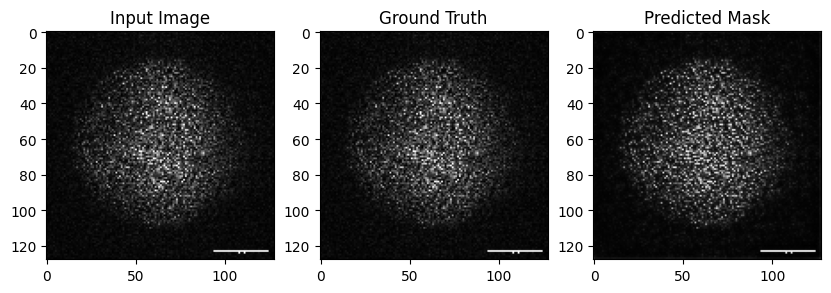

In [ ]:
preds = model.predict(X_val)

# Show the first input image, the ground truth, and the prediction
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.squeeze(X_val[0]), cmap='gray')
plt.title("Input Image")

plt.subplot(1, 3, 2)
plt.imshow(np.squeeze(Y_val[0]), cmap='gray')
plt.title("Ground Truth")

plt.subplot(1, 3, 3)
plt.imshow(np.squeeze(preds[0]), cmap='gray')
plt.title("Predicted Mask")

plt.show()


**K means starts here!**

In [1]:
!pip install opencv-python-headless scikit-learn matplotlib


Mounted at /content/drive
Loaded 8 images with shape: (128, 128)


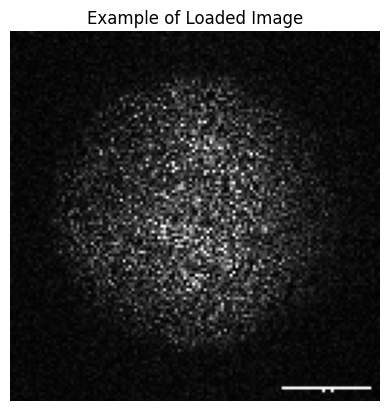

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
import os

# Load and preprocess 8 images
def load_images_from_folder(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.png') or filename.endswith('.jpg'):  # adjust for your file types
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, (128, 128))  # Resize to 128x128 for consistency
            if img is not None:
                images.append(img)
    return np.array(images)

# Mount Google Drive
drive.mount('/content/drive')

# Folder containing the images (replace with your folder path)
folder_path = '/content/drive/MyDrive/Bio Imaging Computer Vision - eSRRF images/'
images = load_images_from_folder(folder_path)

# Check the shape of loaded images
print(f"Loaded {images.shape[0]} images with shape: {images.shape[1:]}")

# Display the first image for verification
plt.imshow(images[0], cmap='gray')
plt.title("Example of Loaded Image")
plt.axis('off')
plt.show()


**K means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

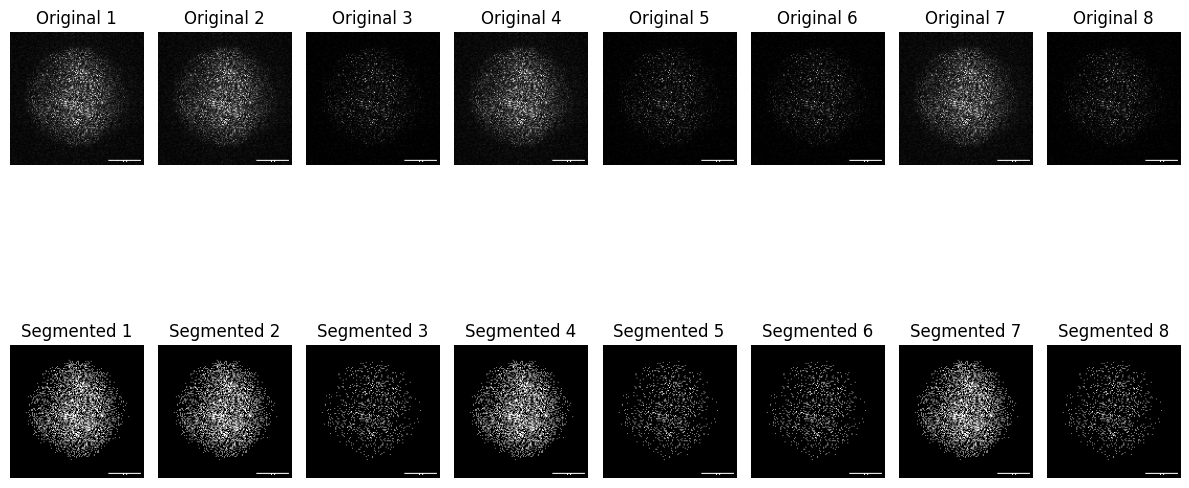

In [3]:
def segment_image_with_kmeans(image, k=3):
    # Flatten the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)  # Convert to float for KMeans

    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Get the labels and reshape back to the image shape
    segmented_image = kmeans.labels_.reshape(image.shape)

    return segmented_image

# Apply K-Means segmentation to each image
segmented_images = [segment_image_with_kmeans(image, k=3) for image in images]

# Display the original and segmented images side by side
plt.figure(figsize=(12, 8))

for i in range(8):  # Assuming you have 8 images
    plt.subplot(2, 8, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    plt.subplot(2, 8, i+9)
    plt.imshow(segmented_images[i], cmap='gray')
    plt.title(f'Segmented {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
from google.colab import files
import os
import cv2

# Create a local folder in Colab for saving the images temporarily
output_folder = '/content/Segmented_Results'
os.makedirs(output_folder, exist_ok=True)

# Save the segmented images locally in Colab
for i, segmented_img in enumerate(segmented_images):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')
    cv2.imwrite(output_path, (segmented_img * 255).astype('uint8'))  # Convert to 8-bit before saving
    print(f"Saved: {output_path}")

# Download the images to your local computer
for i in range(len(segmented_images)):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')
    files.download(output_path)

print("All segmented images have been downloaded.")



Saved: /content/Segmented_Results/segmented_image_1.png
Saved: /content/Segmented_Results/segmented_image_2.png
Saved: /content/Segmented_Results/segmented_image_3.png
Saved: /content/Segmented_Results/segmented_image_4.png
Saved: /content/Segmented_Results/segmented_image_5.png
Saved: /content/Segmented_Results/segmented_image_6.png
Saved: /content/Segmented_Results/segmented_image_7.png
Saved: /content/Segmented_Results/segmented_image_8.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All segmented images have been downloaded.


**K = 3**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

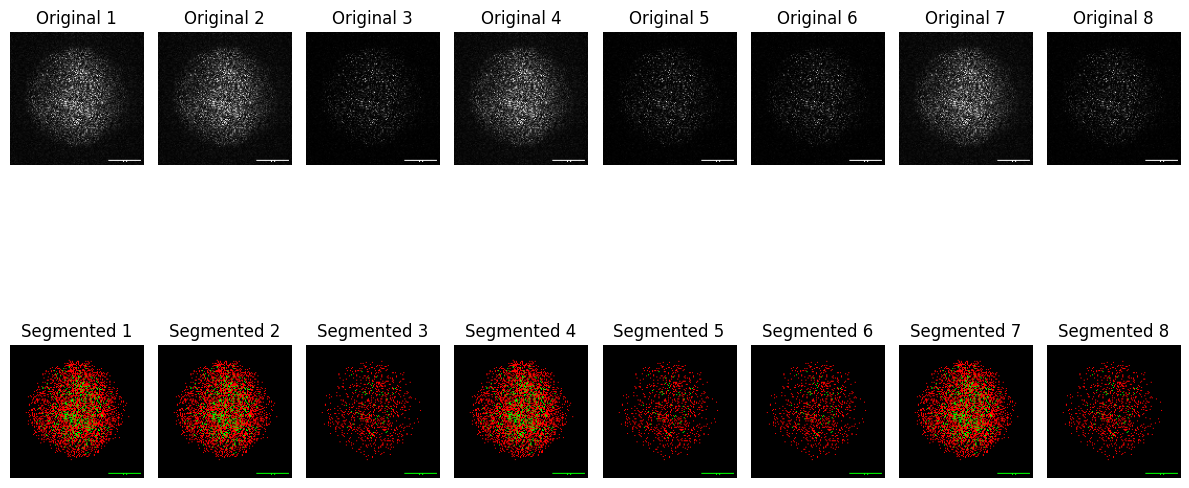

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Segment image using K-Means and color only the actin clusters with different colors
def segment_image_with_kmeans(image, k=3, actin_cluster_indices=[1, 2]):  # Assume actin filaments are in clusters 1 and 2
    # Flatten the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)  # Convert to float for KMeans

    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Get the labels and reshape back to the original image shape
    labels = kmeans.labels_.reshape(image.shape)

    # Create an empty image for the segmented result (same size as the input, but RGB)
    segmented_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Define background color (black) and fixed colors for actin clusters
    background_color = np.array([0, 0, 0])  # Background will be black
    actin_colors = {
        1: np.array([255, 0, 0]),  # Red for actin cluster 1
        2: np.array([0, 255, 0]),  # Green for actin cluster 2
        3: np.array([0, 0, 255]),  # Blue for actin cluster 3
    }

    # Apply the same background color to all clusters
    segmented_image[:] = background_color

    # Color each cluster with its respective color (fixed across all images)
    for cluster_idx in actin_cluster_indices:
        if cluster_idx in actin_colors:
            segmented_image[labels == cluster_idx] = actin_colors[cluster_idx]

    return segmented_image

# Apply K-Means segmentation to each image with k=3 clusters
# Assume clusters 1 and 2 represent actin filaments, and cluster 0 is the background
segmented_images = [segment_image_with_kmeans(image, k=3, actin_cluster_indices=[1, 2]) for image in images]

# Display the original and segmented images side by side
plt.figure(figsize=(12, 8))

for i in range(8):  # Assuming you have 8 images
    # Display original images
    plt.subplot(2, 8, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Display segmented images
    plt.subplot(2, 8, i + 9)
    plt.imshow(segmented_images[i])  # Show the RGB segmented image
    plt.title(f'Segmented {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
from google.colab import files
import os
import cv2

# Create a local folder in Colab for saving the images temporarily
output_folder = '/content/Segmented_Results'
os.makedirs(output_folder, exist_ok=True)

# Save the segmented images locally in Colab (make sure we handle RGB properly)
for i, segmented_img in enumerate(segmented_images):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')
    # Save the image with RGB channels intact (OpenCV saves in BGR format, so we convert)
    segmented_img_bgr = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, segmented_img_bgr)  # Save as a PNG file
    print(f"Saved: {output_path}")

# Download the images to your local computer
for i in range(len(segmented_images)):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')
    files.download(output_path)

print("All segmented images have been downloaded.")



Saved: /content/Segmented_Results/segmented_image_1.png
Saved: /content/Segmented_Results/segmented_image_2.png
Saved: /content/Segmented_Results/segmented_image_3.png
Saved: /content/Segmented_Results/segmented_image_4.png
Saved: /content/Segmented_Results/segmented_image_5.png
Saved: /content/Segmented_Results/segmented_image_6.png
Saved: /content/Segmented_Results/segmented_image_7.png
Saved: /content/Segmented_Results/segmented_image_8.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All segmented images have been downloaded.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

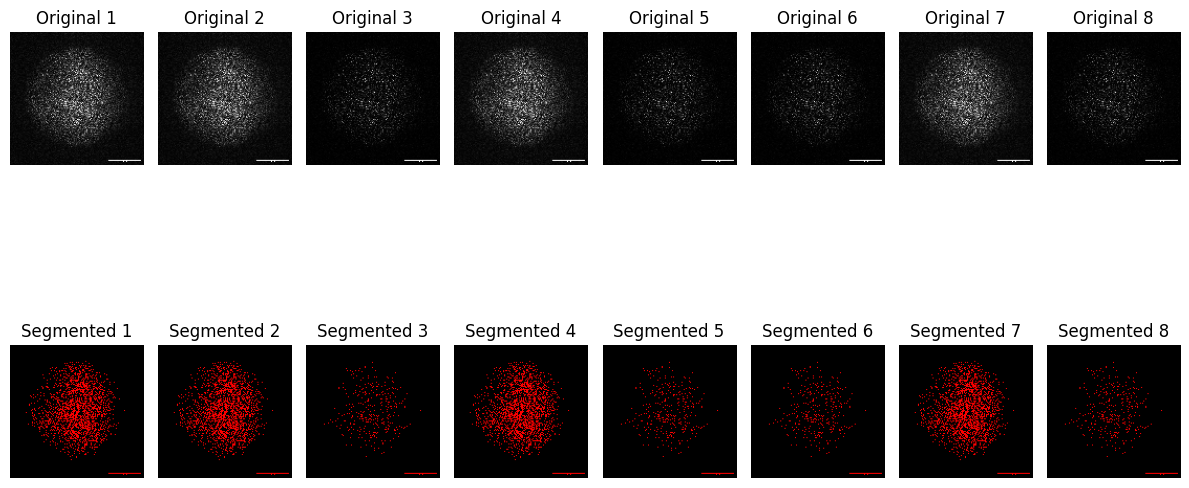

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Segment image using K-Means and color the actin clusters differently
def segment_image_with_kmeans(image, k=2, actin_cluster_indices=[1]):  # Assume actin filaments are in cluster 1
    # Flatten the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)  # Convert to float for KMeans

    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Get the labels and reshape back to the original image shape
    labels = kmeans.labels_.reshape(image.shape)

    # Create an empty image for the segmented result (same size as the input, but RGB)
    segmented_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Define background color (black) and fixed color for actin clusters
    background_color = np.array([0, 0, 0])  # Background will be black
    actin_color = np.array([255, 0, 0])  # Red for actin cluster

    # Apply background color to cluster 0 (assuming it's the background)
    segmented_image[labels == 0] = background_color

    # Apply actin color to cluster 1 (assuming it's the actin filament)
    for cluster_idx in actin_cluster_indices:
        segmented_image[labels == cluster_idx] = actin_color

    return segmented_image

# Apply K-Means segmentation to each image with k=2 clusters
# Assume cluster 1 represents actin filaments, and cluster 0 is the background
segmented_images = [segment_image_with_kmeans(image, k=2, actin_cluster_indices=[1]) for image in images]

# Display the original and segmented images side by side
plt.figure(figsize=(12, 8))

for i in range(8):  # Assuming you have 8 images
    # Display original images
    plt.subplot(2, 8, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Display segmented images
    plt.subplot(2, 8, i + 9)
    plt.imshow(segmented_images[i])  # Show the RGB segmented image
    plt.title(f'Segmented {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [15]:
from google.colab import files
import os
import cv2

# Create a local folder in Colab for saving the images temporarily
output_folder = '/content/Segmented_Results'
os.makedirs(output_folder, exist_ok=True)

# Save the segmented images locally in Colab (make sure we handle RGB properly)
for i, segmented_img in enumerate(segmented_images):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')

    # Save the image with RGB channels intact (OpenCV saves in BGR format, so we convert)
    segmented_img_bgr = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
    cv2.imwrite(output_path, segmented_img_bgr)  # Save as a PNG file
    print(f"Saved: {output_path}")

# Download the images to your local computer
for i in range(len(segmented_images)):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')
    files.download(output_path)

print("All segmented images have been downloaded.")


Saved: /content/Segmented_Results/segmented_image_1.png
Saved: /content/Segmented_Results/segmented_image_2.png
Saved: /content/Segmented_Results/segmented_image_3.png
Saved: /content/Segmented_Results/segmented_image_4.png
Saved: /content/Segmented_Results/segmented_image_5.png
Saved: /content/Segmented_Results/segmented_image_6.png
Saved: /content/Segmented_Results/segmented_image_7.png
Saved: /content/Segmented_Results/segmented_image_8.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All segmented images have been downloaded.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

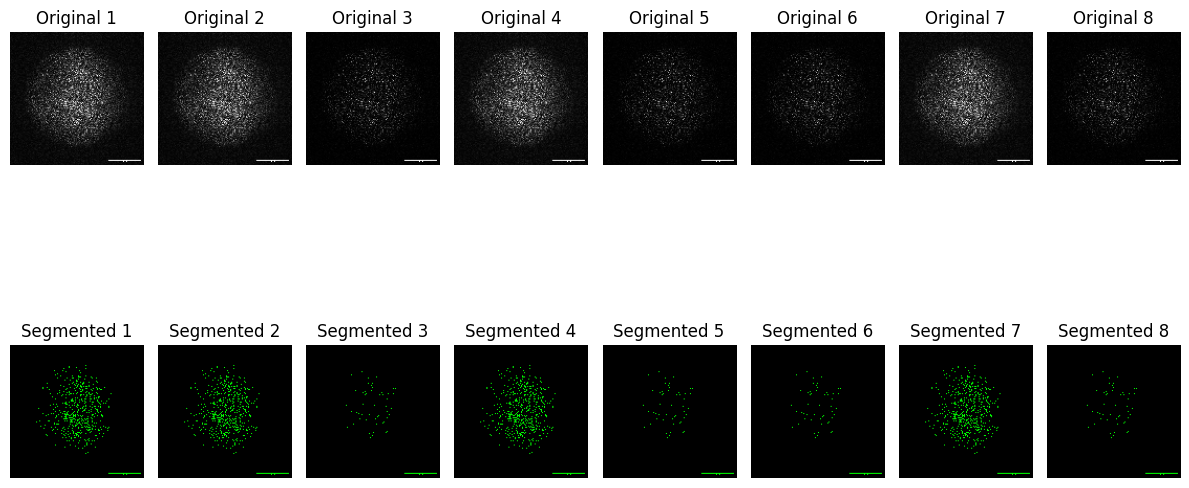

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Segment image using K-Means and capture only green and black areas
def segment_image_with_kmeans(image, k=3, actin_cluster_indices=[2]):  # Only use the green cluster
    # Flatten the image to a 2D array of pixels
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)  # Convert to float for KMeans

    # Apply KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixel_values)

    # Get the labels and reshape back to the original image shape
    labels = kmeans.labels_.reshape(image.shape)

    # Create an empty image for the segmented result (same size as the input, but RGB)
    segmented_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

    # Define background color (black) and green color for actin clusters
    background_color = np.array([0, 0, 0])  # Black for background
    actin_color = np.array([0, 255, 0])  # Green for actin cluster

    # Apply background color to all pixels by default
    segmented_image[:] = background_color

    # Apply green color to the specified actin cluster(s)
    for cluster_idx in actin_cluster_indices:
        segmented_image[labels == cluster_idx] = actin_color

    return segmented_image

# Apply K-Means segmentation to each image with k=3 clusters
# Assume cluster 2 represents actin filaments (green), and cluster 0 is the background (black)
segmented_images = [segment_image_with_kmeans(image, k=3, actin_cluster_indices=[2]) for image in images]

# Display the original and segmented images side by side
plt.figure(figsize=(12, 8))

for i in range(8):  # Assuming you have 8 images
    # Display original images
    plt.subplot(2, 8, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Original {i+1}')
    plt.axis('off')

    # Display segmented images with only green and black
    plt.subplot(2, 8, i + 9)
    plt.imshow(segmented_images[i])  # Show the RGB segmented image
    plt.title(f'Segmented {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [22]:
from google.colab import files
import os
import cv2

# Create a local folder in Colab for saving the images temporarily
output_folder = '/content/Segmented_Results'
os.makedirs(output_folder, exist_ok=True)

# Save the segmented images locally in Colab (make sure we handle RGB properly)
for i, segmented_img in enumerate(segmented_images):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')

    # Convert the segmented image from RGB to BGR (OpenCV saves in BGR format)
    segmented_img_bgr = cv2.cvtColor(segmented_img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR

    # Save the image as a PNG file
    cv2.imwrite(output_path, segmented_img_bgr)
    print(f"Saved: {output_path}")

# Download the images to your local computer
for i in range(len(segmented_images)):
    output_path = os.path.join(output_folder, f'segmented_image_{i+1}.png')
    files.download(output_path)

print("All segmented images have been downloaded.")


Saved: /content/Segmented_Results/segmented_image_1.png
Saved: /content/Segmented_Results/segmented_image_2.png
Saved: /content/Segmented_Results/segmented_image_3.png
Saved: /content/Segmented_Results/segmented_image_4.png
Saved: /content/Segmented_Results/segmented_image_5.png
Saved: /content/Segmented_Results/segmented_image_6.png
Saved: /content/Segmented_Results/segmented_image_7.png
Saved: /content/Segmented_Results/segmented_image_8.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All segmented images have been downloaded.


**autoencoders**

In [ ]:
!pip install tensorflow opencv-python-headless matplotlib


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 128, 128, 1)         │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6957 - val_loss: 0.6855
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - loss: 0.6855 - val_loss: 0.6675
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 0.6675 - val_loss: 0.6353
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - loss: 0.6353 - val_loss: 0.5852
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - loss: 0.5852 - val_loss: 0.5228
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 0.5228 - val_loss: 0.4770
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step - loss: 0.4770 - val_loss: 0.4857
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - loss: 0.4857 - val_loss: 0.5008
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - loss: 0.5008 - val_loss: 0.4796
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - loss: 0.4796 - val_loss: 0.4440
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - loss: 0.4440 - val_loss: 0.4161
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - loss: 0.4161 - val_loss:

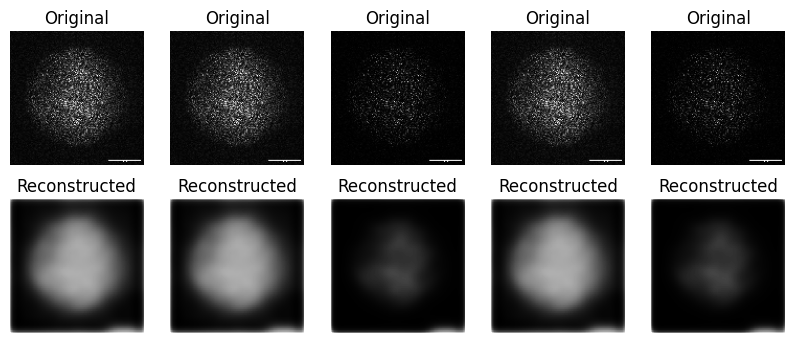

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Load and preprocess 8 images
def load_images_from_folder(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.png') or filename.endswith('.jpg'):  # adjust for your file types
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, (128, 128))  # Resize to 128x128 for consistency
            if img is not None:
                images.append(img)
    return np.array(images)

# Folder containing the images
folder_path = '/content/drive/MyDrive/Bio Imaging Computer Vision - eSRRF images/'
images = load_images_from_folder(folder_path)

# Normalize the images
images = images.astype('float32') / 255.0
images = np.expand_dims(images, axis=-1)  # Add channel dimension

# Define Autoencoder Architecture
input_img = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Bottleneck
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build and compile the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the model architecture
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(images, images, epochs=50, batch_size=8, shuffle=True, validation_split=0.2)

# Encode and decode images (i.e., reconstruct images)
decoded_images = autoencoder.predict(images)

# Display some of the original and reconstructed images
n = 5  # Display first 5 images
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original images
    plt.subplot(2, n, i + 1)
    plt.imshow(np.squeeze(images[i]), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.squeeze(decoded_images[i]), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [ ]:
# Create a folder in Google Drive to save the reconstructed images
output_folder = '/content/drive/MyDrive/Autoencoder_Reconstructions'
os.makedirs(output_folder, exist_ok=True)

# Save the reconstructed images
for i, reconstructed_img in enumerate(decoded_images):
    output_path = os.path.join(output_folder, f'reconstructed_image_{i+1}.png')
    cv2.imwrite(output_path, (reconstructed_img * 255).astype('uint8'))  # Convert back to 8-bit grayscale before saving

print(f"Reconstructed images saved to {output_folder}")


Reconstructed images saved to /content/drive/MyDrive/Autoencoder_Reconstructions


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


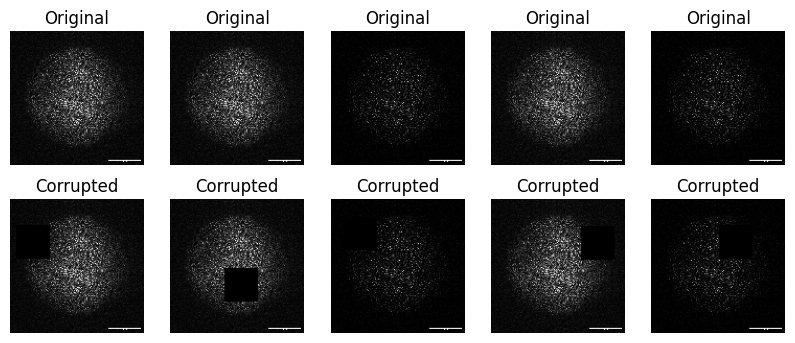

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6913 - val_loss: 0.6727
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.6732 - val_loss: 0.6361
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step - loss: 0.6373 - val_loss: 0.5737
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - loss: 0.5755 - val_loss: 0.5022
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - loss: 0.5022 - val_loss: 0.4769
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step - loss: 0.4701 - val_loss: 0.5137
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - loss: 0.5000 - val_loss: 0.5004
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - loss: 0.4870 - val_loss: 0.4571
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - loss: 0.4470 - val_loss: 0.4209
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - loss: 0.4147 - val_loss: 0.4050
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - loss: 0.4016 - val_loss: 0.3994
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - loss: 0.3976 - val_loss: 0.

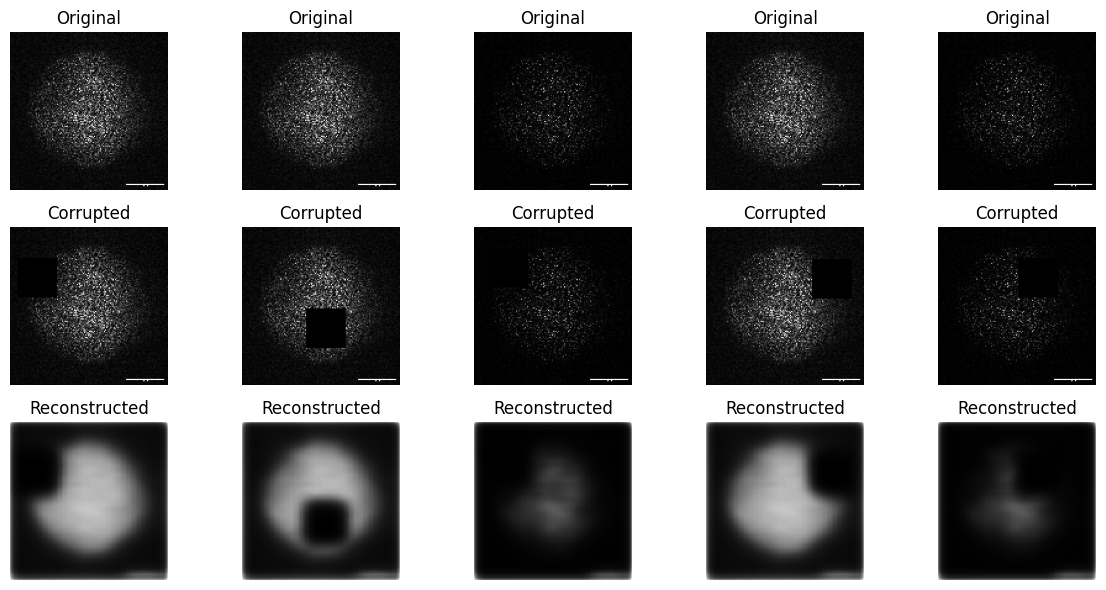

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load and preprocess 8 images
def load_images_from_folder(folder_path):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith('.png') or filename.endswith('.jpg'):  # adjust for your file types
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            img = cv2.resize(img, (128, 128))  # Resize to 128x128 for consistency
            if img is not None:
                images.append(img)
    return np.array(images)

# Folder containing the images
folder_path = '/content/drive/MyDrive/Bio Imaging Computer Vision - eSRRF images/'
images = load_images_from_folder(folder_path)

# Normalize the images
images = images.astype('float32') / 255.0
images = np.expand_dims(images, axis=-1)  # Add channel dimension

# Create corrupted versions of the images by masking part of the image
def create_corrupted_images(images, mask_size=32):
    corrupted_images = images.copy()
    for img in corrupted_images:
        x = np.random.randint(0, 128 - mask_size)
        y = np.random.randint(0, 128 - mask_size)
        img[x:x+mask_size, y:y+mask_size, :] = 0  # Set a random patch to 0
    return corrupted_images

corrupted_images = create_corrupted_images(images)

# Display original and corrupted images
plt.figure(figsize=(10, 4))
for i in range(5):  # Display first 5 images
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.squeeze(images[i]), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Corrupted image
    plt.subplot(2, 5, i + 6)
    plt.imshow(np.squeeze(corrupted_images[i]), cmap='gray')
    plt.title("Corrupted")
    plt.axis('off')
plt.show()

# Define Autoencoder for Image Inpainting
input_img = Input(shape=(128, 128, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Bottleneck
encoded = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build and compile the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(corrupted_images, images, epochs=50, batch_size=8, shuffle=True, validation_split=0.2)

# Use the trained autoencoder to reconstruct the images
reconstructed_images = autoencoder.predict(corrupted_images)

# Display original, corrupted, and reconstructed images
n = 5  # Display first 5 images
plt.figure(figsize=(12, 6))
for i in range(n):
    # Original images
    plt.subplot(3, n, i + 1)
    plt.imshow(np.squeeze(images[i]), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Corrupted images
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(np.squeeze(corrupted_images[i]), cmap='gray')
    plt.title("Corrupted")
    plt.axis('off')

    # Reconstructed images
    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(np.squeeze(reconstructed_images[i]), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()
